In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%load_ext tensorboard

# To work around 'kernel died' errors
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

**Common Functions**

Helper functions used by each task to work with its respective model and parameters.

In [2]:
def load_mnist_data():
    """
    Load MNIST data set.
    
    Returns
    -------
    tuple
        train data split
    tuple
        validation data split
    tuple
        test data split
    """
    
    # Load MNIST data
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    # Prepare input data
    x_train = x_train.reshape(60000, 28, 28, 1).astype("float32")/255 
    x_test = x_test.reshape(10000, 28, 28, 1).astype("float32")/255
    y_train = y_train.astype("float32")
    y_test = y_test.astype("float32")

    # Establish train and validation splits
    x_validation = x_train[-10000:]
    y_validation = y_train[-10000:]
    x_train = x_train[:-10000]
    y_train = y_train[:-10000]

    return (x_train, y_train), (x_validation, y_validation), (x_test, y_test)

In [3]:
def plot(history, metric):
    """
    Plot metrics computed against training and validation sets, across epochs.
    
    Parameters
    ----------
    history: tf.keras.callbacks.History
        History object returned from `model.fit()` call, containing computed metrics
    metric: str
        Name of computed metric to plot
    """
    
    if(metric == 'accuracy'):
        metric_name = 'acc'
    else:
        metric_name = metric
    train_loss = history.history[metric_name]
    val_loss = history.history['val_' + metric_name]
    epoch_count = range(1, len(train_loss) + 1)
    plt.title(metric + ' observed against training and validation sets')
    plt.plot(epoch_count, train_loss, 'r')
    plt.plot(epoch_count, val_loss, 'b')
    plt.legend(['Training ' + metric, 'Validation ' + metric])
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.show()

In [4]:
def train_validate_test(name, model, train_data, validation_data, test_data, 
                        batch_size = 128, epochs = 5, optimizer = 'sgd', metrics = ['accuracy']):
    """
    Train and test a provided model definition along with its parameters and display associated metrics.

    Parameters
    ----------
    name : str
        Name to distinguish current run from other runs
    model : tf.keras.models.X
        Definition of a model to be trained and tested
    train_data : tuple
        Tuple of input and output training data sets
    validation_data : tuple
        Tuple of input and output validation data sets
    test_data : tuple
        Tuple of input and output test data sets
    batch_size : int
        Number of data instances to process in a single batch; default value is 128
    epochs : int
        Number of iterations or epochs through which the model is to be trained; default value is 5
    optimizer: str
        Name of optimizer to use during training; default value is 'sgd'
    metrics: list
        List of metrics to compute during training and testing phases; default value is ['accuracy']
    """
    
    # Compile model
    model.compile(loss ='sparse_categorical_crossentropy', optimizer = optimizer, metrics = metrics)
    
    # Configure Tensorboard
    logdir = os.path.join("logs", name)
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

    # Train model on training set and validate using validation set
    x_train, y_train = train_data
    history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = validation_data, callbacks=[tensorboard_callback])

    # Plot metrics from training
    plot(history, 'loss')
    plot(history, 'accuracy')
    
    # Evaluate model on test set and display metrics
    x_test, y_test = test_data
    results = model.evaluate(x_test, y_test, batch_size = batch_size)
    print("test loss, test acc:", results)

------------------------------------

**Fixed parameters**

For the purposes of consistency, the following parameters are fixed for Task 1-3

Sigmoid transfer function for hidden layers

Softmax activation function for the output layer

Categorical cross entropy as loss function

Stochastic Gradient Descent (SGD) as the optimization algorithm

_*For all Part 1 tasks add a dense layer on the top to connect to the 10 possible output values._

_*For Task  1 & 2, set training epochs to 5 and a fixed batch size of 128._

------------------------------------

**TASK 1** 

Implement a simple CNN with the following parameters fixed. 

A Convolutional layer will have 32 neurons (feature maps) and a 5x5 feature detector.

After training and evaluating the network, document the quality metrics and findings in your Jupyter Notebook.

In [5]:
def task1_model():
    """
    Implement a simple CNN with the following parameters fixed.
    A Convolutional layer will have 32 neurons (feature maps) and a 5x5 feature detector.
    
    Returns
    -------
    tf.keras.Sequential
        CNN model for task 1
    """
    model = keras.Sequential()
    model.add(layers.Conv2D(32, (5,5), activation = 'sigmoid', input_shape=(28, 28, 1)))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation = 'softmax'))
    return model

**Hypothesis**

Model will not overfit to training data split.

In [7]:
def task1():
    
    # Load data into respective splits
    train_data, validation_data, test_data = load_mnist_data()

    # Train and test model
    train_validate_test("task1", task1_model(), train_data, validation_data, test_data)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 27s 550us/sample - loss: 4.2234 - acc: 0.3668 - val_loss: 0.8382 - val_acc: 0.7277
Epoch 2/5
50000/50000 [==============================] - 30s 594us/sample - loss: 0.6344 - acc: 0.8114 - val_loss: 0.5002 - val_acc: 0.8410
Epoch 3/5
50000/50000 [==============================] - 30s 593us/sample - loss: 0.4819 - acc: 0.8563 - val_loss: 0.4413 - val_acc: 0.8580
Epoch 4/5
50000/50000 [==============================] - 30s 592us/sample - loss: 0.4263 - acc: 0.8733 - val_loss: 0.3629 - val_acc: 0.8968
Epoch 5/5
50000/50000 [==============================] - 31s 626us/sample - loss: 0.3992 - acc: 0.8807 - val_loss: 0.3566 - val_acc: 0.8914


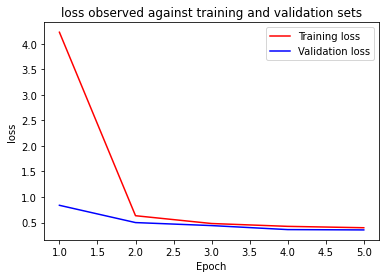

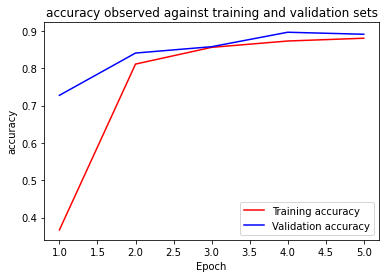

10000/10000 [==============================] - 2s 214us/sample - loss: 0.3669 - acc: 0.8875
test loss, test acc: [0.3668946839332581, 0.8875]


In [8]:
task1()

**Observation**

Given locality of model accuracy across all data splits, model does not overfit to training data split.

**Rationale**

Instances in all data splits come from the same distribution. 

------------------------------------

**TASK 2** 

Increase the complexity of the CNN by adding multiple convolution and dense layers. 

Add one more convolutional layer with 32 neurons (feature maps) and a 5x5 feature detector. 

Add a dense layer with 128 nodes.

After training and evaluating the network, document the quality metrics and findings in your Jupyter Notebook. Each case must have a corresponding hypothesis for what you think will happen as well as your interpretation of the results with a comparison to your expected.

In [6]:
def task2_model():
    """
    Increase the complexity of the CNN by adding multiple convolution and dense layers. 
    Add one more convolutional layer with 32 neurons (feature maps) and a 5x5 feature detector. 
    Add a dense layer with 128 nodes.
    
    Returns
    -------
    tf.keras.Sequential
        CNN model for task 2
    """
    
    model = task1_model()
    model.pop()
    model.pop() # remove last 2 layers to add layers as instructed for this task
    model.add(layers.Conv2D(32, (5,5), activation = 'sigmoid'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation = 'sigmoid'))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation = 'softmax'))
    return model

**Hypotheses**

(A) Inclusion of a second convolutional hidden layer will improve accuracy.

(B) Inclusion of an additional dense 128-node hidden layer will increase training time.

In [4]:
def task2():
    
    # Load data into respective splits
    train_data, validation_data, test_data = load_mnist_data()

    # Train and test model
    train_validate_test("task2", task2_model(), train_data, validation_data, test_data)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 70s 1ms/sample - loss: 2.3066 - acc: 0.1071 - val_loss: 2.3010 - val_acc: 0.1101
Epoch 2/5
50000/50000 [==============================] - 77s 2ms/sample - loss: 2.3007 - acc: 0.1156 - val_loss: 2.2950 - val_acc: 0.1110
Epoch 3/5
50000/50000 [==============================] - 77s 2ms/sample - loss: 2.2916 - acc: 0.1306 - val_loss: 2.2797 - val_acc: 0.1082
Epoch 4/5
50000/50000 [==============================] - 77s 2ms/sample - loss: 2.2521 - acc: 0.2052 - val_loss: 2.1920 - val_acc: 0.4233
Epoch 5/5
50000/50000 [==============================] - 80s 2ms/sample - loss: 1.9269 - acc: 0.5323 - val_loss: 1.4736 - val_acc: 0.7098


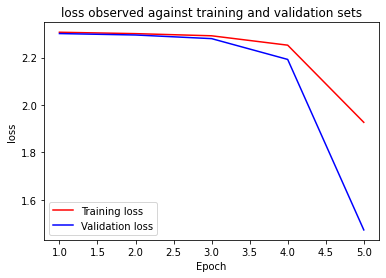

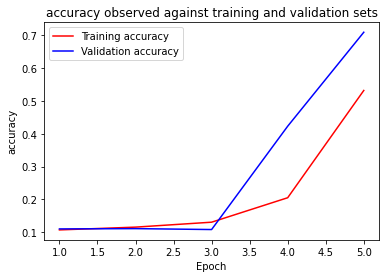

10000/10000 [==============================] - 7s 690us/sample - loss: 1.4670 - acc: 0.7134
test loss, test acc: [1.4670451921463012, 0.7134]


In [11]:
task2()

In [14]:
%tensorboard --logdir logs

**Observations**

(A) Training set accuracy lags behind validation set accuracy, and so is the corresponding loss given a fixed number of epochs. 

(B) Time per training epoch has increased by more than two-fold compared to the model in task 1.

**Rationale**

(A) It is likely that the current learning rate is not sufficient for the model training in task 2, to reach a stable accuracy level across both its training and validation sets, compared to task 1. Tensorboard scalar charts above, plotting epoch accuracy and epoch validation accuracy metrics across both runs `task1` and `task2`, imply this. 

(B) Inclusion of a 128-node dense hidden layer results in an increase of more than 2x the training time as that without. 

-------------------------------------------

**TASK 3** 

Document answers to the following questions:

How can you improve the models built in Tasks 1 & 2?

Using only convolutional layers, will hyper-parameter optimization (no of layer, no of the nodes, learning rate, etc) help in increasing the accuracy? If yes, implement the changes and report your results. 

**Hypotheses**

(A) Increasing learning rate for model training in task 2 will yield low loss and high accuracy upon training set, similar to that observed upon validation set, keeping number of epochs fixed.

(B) Switching to a different optimization strategy will yield lower loss and higher accuracy for model used in task 1. 

(C) Removing dense hidden layer in model used in task 2 on its own will improve training time. Reducing number of nodes in penultimate convolutional hidden layer will improve accuracy. 

In [8]:
def task3_hypA_lrPoint1():
      
    # Load data into respective splits
    train_data, validation_data, test_data = load_mnist_data()

    # Train and test model
    train_validate_test("task3_hypA_lrPoint1", task2_model(), train_data, validation_data, test_data, 
                       optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1)) # learning rate increased by 10x

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 69s 1ms/sample - loss: 2.3132 - acc: 0.1064 - val_loss: 2.3016 - val_acc: 0.1064
Epoch 2/5
50000/50000 [==============================] - 71s 1ms/sample - loss: 1.2926 - acc: 0.5679 - val_loss: 0.3949 - val_acc: 0.8883
Epoch 3/5
50000/50000 [==============================] - 75s 1ms/sample - loss: 0.3575 - acc: 0.8963 - val_loss: 0.2698 - val_acc: 0.9226
Epoch 4/5
50000/50000 [==============================] - 75s 2ms/sample - loss: 0.2735 - acc: 0.9186 - val_loss: 0.2285 - val_acc: 0.9350
Epoch 5/5
50000/50000 [==============================] - 78s 2ms/sample - loss: 0.2254 - acc: 0.9337 - val_loss: 0.1937 - val_acc: 0.9454


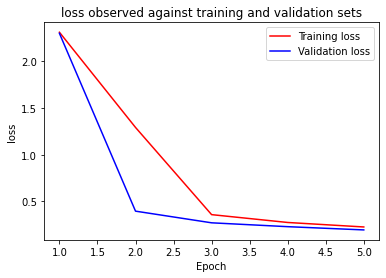

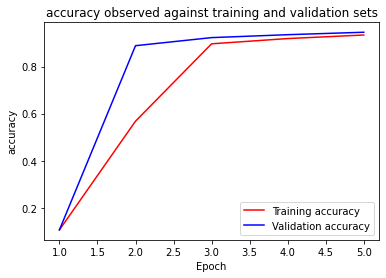

10000/10000 [==============================] - 6s 628us/sample - loss: 0.2005 - acc: 0.9427
test loss, test acc: [0.20051235080957414, 0.9427]


In [9]:
task3_hypA_lrPoint1()

In [10]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 33181), started 0:40:25 ago. (Use '!kill 33181' to kill it.)

**Observation (A)**

Increasing learning rate for model training in task 2 does yield low loss and high accuracy upon training set, similar to that observed upon validation set, keeping number of epochs fixed. Tensorboard scalar charts plotting loss and accuracy metrics across both runs `task2` and `task3_hypA_lrPoint1` demonstrate this. Test set accuracy has also increased by 25% with this change.

**Rationale (A)**

The inclusion of additional layers with many more nodes would have resulted in a modified set of eventual updates to the model in task 2 compared to that in task 1. This could have rendered SGD with a default learning rate of 0.01, unable to adjust the model to incur low loss or high accuracy within the prescribed 5 epochs of training. Increasing this learning rate by 10x, to 0.1, could have rendered SGD to adjust the model appropriately within the 5 epochs of training to arrive at much increased accuracy and lower loss as compared to the prior run of task 2.

In [7]:
def task3_hypB_Adam():
      
    # Load data into respective splits
    train_data, validation_data, test_data = load_mnist_data()

    # Train and test model
    train_validate_test("task3_hypB_Adam", task1_model(), train_data, validation_data, test_data, 
                       optimizer = 'adam') # use Adam optimizer instead of SGD

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 31s 629us/sample - loss: 1.3987 - acc: 0.6763 - val_loss: 0.3548 - val_acc: 0.9004
Epoch 2/5
50000/50000 [==============================] - 34s 677us/sample - loss: 0.3969 - acc: 0.8786 - val_loss: 0.3299 - val_acc: 0.9000
Epoch 3/5
50000/50000 [==============================] - 35s 696us/sample - loss: 0.3580 - acc: 0.8923 - val_loss: 0.3008 - val_acc: 0.9145
Epoch 4/5
50000/50000 [==============================] - 35s 699us/sample - loss: 0.3254 - acc: 0.9024 - val_loss: 0.2407 - val_acc: 0.9285
Epoch 5/5
50000/50000 [==============================] - 36s 714us/sample - loss: 0.2935 - acc: 0.9135 - val_loss: 0.2585 - val_acc: 0.9192


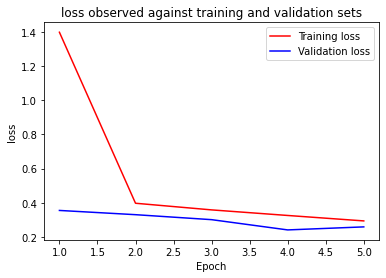

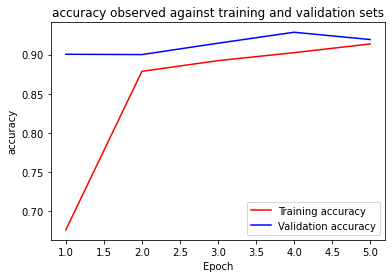

10000/10000 [==============================] - 2s 210us/sample - loss: 0.2675 - acc: 0.9183
test loss, test acc: [0.2674822244286537, 0.9183]


In [8]:
task3_hypB_Adam()

In [9]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 33181), started 1:01:36 ago. (Use '!kill 33181' to kill it.)

**Observation (B)**

Switching to a different optimization strategy does yield lower loss and higher accuracy for model used in task 1. Tensorboard scalar charts plotting loss and accuracy metrics across both runs `task1` and `task3_hypB_Adam` demonstrate this.

**Rationale (B)**

Using Adam optimization strategy in place of SGD results in increased accuracy and decreased loss, compared to observations from task 1. Adam optimization uses per-parameter learning rates that are different from one another, there by resulting in personalized updates to the model parameters, possibly helping the model identify better parameter values during training thus helping obtain increased accuracy against training and validation sets. 

In [7]:
def task3_model():
    """
    Reduce the complexity of the CNN in task 2 by removing non-convolutional hidden layers 
    and reducing number of nodes used in the penultimate convolutional layer. 
    
    Returns
    -------
    tf.keras.Sequential
        CNN model for task 3
    """
    
    model = task1_model()
    model.pop()
    model.pop() # remove last 2 layers to add layers as instructed for this task
    model.add(layers.Conv2D(8, (5,5), activation = 'sigmoid'))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation = 'softmax'))
    return model

In [8]:
def task3_hypC():
    
    # Load data into respective splits
    train_data, validation_data, test_data = load_mnist_data()

    # Train and test model
    train_validate_test("task3_hypC", task3_model(), train_data, validation_data, test_data)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 45s 893us/sample - loss: 2.3022 - acc: 0.1201 - val_loss: 2.2896 - val_acc: 0.1064
Epoch 2/5
50000/50000 [==============================] - 41s 824us/sample - loss: 2.0193 - acc: 0.3747 - val_loss: 1.2208 - val_acc: 0.7183
Epoch 3/5
50000/50000 [==============================] - 43s 864us/sample - loss: 0.7692 - acc: 0.8027 - val_loss: 0.5180 - val_acc: 0.8616
Epoch 4/5
50000/50000 [==============================] - 48s 959us/sample - loss: 0.5066 - acc: 0.8545 - val_loss: 0.4168 - val_acc: 0.8843
Epoch 5/5
50000/50000 [==============================] - 50s 1ms/sample - loss: 0.4411 - acc: 0.8720 - val_loss: 0.3776 - val_acc: 0.8919


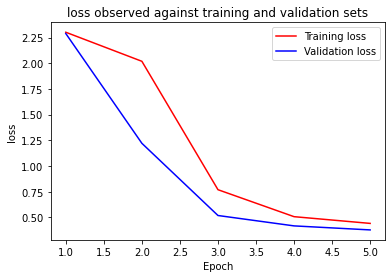

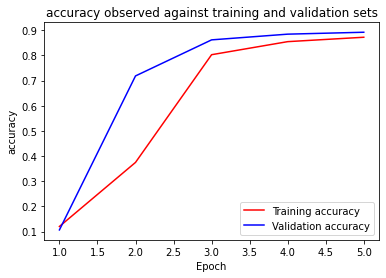

10000/10000 [==============================] - 4s 443us/sample - loss: 0.3937 - acc: 0.8866s - lo
test loss, test acc: [0.3937224017620087, 0.8866]


In [9]:
task3_hypC()

In [10]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 33181), started 2:09:47 ago. (Use '!kill 33181' to kill it.)

**Observation (C)**

Removing dense hidden layer in model used in task 2 on its own does improve training time, by about 43%.

Reducing number of nodes in penultimate convolutional hidden layer does improve accuracy, without change in epochs. 

Tensorboard scalar charts plotting loss and accuracy across runs `task2` and `task3_hypC` demonstrate this.


**Rationale (C)**

Dense hidden layer with 128 nodes would have meant a lot more computations for the model along with a lot more data to be managed in memory, possibly exerting a non-trivial impact on the amount of learning possible within 5 epochs as well as the time taken to complete those 5 epochs of learning. Removing it altogether eased the model to train on the input data sooner. Also, it is not clear as to why this layer was necessary in the first place. Perhaps, goes to show, that arbitrary choices in adjusting model's architecture may hurt more than help. 

Fewer nodes in the penultimate convolutional hidden layer implies fewer parameters to be adjusted, which perhaps resulted in the model not being swayed in the wrong direction as much as it was, prior.

-----------------------------------------

**TASK 4** 

In this task you are free to change any parameter/architecture to improve the quality metrics. 
This is the time to get creative!

After training and evaluating the network, document the quality metrics for each change and include the findings 
in your Jupyter Notebook.

**Hypothesis**

Introduce following changes to the model and its training process:

- Stack multiple sets of a convolutional layer + down-sampling + batch normalization + drop out on top of one another between input and output layers
- Switch activation function used by hidden layers from 'sigmoid' to 'relu'
- Switch optimizer used to adjust parameter values from 'sgd' to 'adam'

In [5]:
def task4_model():
    """
    Reduce the complexity of the CNN in task 2 by removing non-convolutional hidden layers 
    and reducing number of nodes used in the penultimate convolutional layer. 
    
    Returns
    -------
    tf.keras.Sequential
        CNN model for task 4
    """
    
    model = keras.Sequential()
    model.add(layers.Conv2D(64, (2,2), activation = 'relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (4,4), activation = 'relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation = 'softmax'))
    return model

In [6]:
def task4():
    
    # Load data into respective splits
    train_data, validation_data, test_data = load_mnist_data()

    # Train and test model
    train_validate_test("task4", task4_model(), train_data, validation_data, test_data,
                       optimizer = tf.keras.optimizers.Adam())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 88s 2ms/sample - loss: 0.2689 - acc: 0.9225 - val_loss: 5.0915 - val_acc: 0.1064
Epoch 2/5
50000/50000 [==============================] - 87s 2ms/sample - loss: 0.0846 - acc: 0.9764 - val_loss: 0.0424 - val_acc: 0.9873
Epoch 3/5
50000/50000 [==============================] - 87s 2ms/sample - loss: 0.0630 - acc: 0.9815 - val_loss: 0.0398 - val_acc: 0.9888
Epoch 4/5
50000/50000 [==============================] - 89s 2ms/sample - loss: 0.0504 - acc: 0.9853 - val_loss: 0.0326 - val_acc: 0.9902
Epoch 5/5
50000/50000 [==============================] - 88s 2ms/sample - loss: 0.0445 - acc: 0.9864 - val_loss: 0.0296 - val_acc: 0.9919


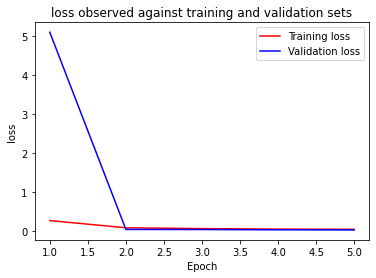

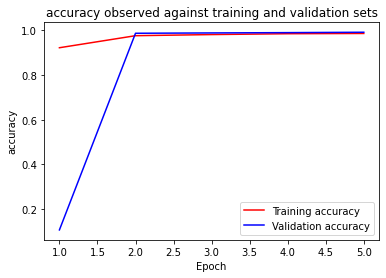

10000/10000 [==============================] - 3s 305us/sample - loss: 0.0314 - acc: 0.9897
test loss, test acc: [0.03140621204925701, 0.9897]


In [7]:
task4()

**Observations**

Overall, these changes introduce a two-fold increase in training time, along with a 10 % increase in accuracy and a 35% decrease in error, compared to what was observed in task 1. Loss and accuracy upon training, validation and test sets converge at their respective lowest and highest points. Per Tensorboard scalar charts that plot these loss and accuracy values across tasks, these are the best yet observed.

**Rationale**

There are multiple forces at play:

- Maxpooling down-samples the convoluted input which could help noise:signal ratio observed by the subsequent convolutional layer. Adding this in between convolutional layers helps the model overall work with a better noise:signal ratio towards learning parameters.

- Batch normalization re-normalizes/re-scales a batch of input entering a convolutional layer there by allowing it to have a minor speed up in computation across that batch within that next convolutional layer. Being done across multiple layers helps in an aggregate fashion.

- Dropout randomly suppresses/removes a certain number of nodes in the subsequent layer from contributing to the layer's overall activation. This allows for both a reduction in overall training time as well as in some sense introduces randomized regularization in the input features that each layer recognizes towards activation. Being done for each convolutional layer makes the model, broadly regularized across different feature maps it learns to recognize.

- Using a `relu` activation function instead of a `sigmoid` activation function in hidden layers helps mitigate vanishing and exploding gradient observed during training of a complex (ie. stacked) network architecture, either of which could result in the model achieving sub-par accuracy or excessive loss. Besides, this could also result in extended training time should convergence not be obtained within the fixed number of training epochs (thus requiring more epochs overall for the otherwise same network with `sigmoid` activation function). 

- Using `adam` optimizer instead of `sgd` allows for customized updates to the model's parameters. This can have a noticeable effect on the rate as well as accuracy of feature maps learned across training epochs. 

In [10]:
%tensorboard --logdir logs